In [1]:
import matplotlib.pyplot as plt
from networkx import nx

In [1]:
#Code copied from the networkx source code and modified so i can save the steps of the simulation
import networkx as nx
import random

def _random_subset(seq, m, rng):
    targets = set()
    while len(targets) < m:
        x = random.choice(seq)
        targets.add(x)
    return targets

def barabasi_albert_steps(n,m,seed=1769):    # Add m initial nodes (m0 in barabasi-speak) #seed added to get consistent graphs
    G = nx.empty_graph(m)
    # Target nodes for new edges
    targets = list(range(m))
    # List of existing nodes, with nodes repeated once for each adjacent edge
    repeated_nodes = []
    # Start adding the other n-m nodes. The first node is m.
    source = m
    while source < n:
        # Add edges to m nodes from the source.
        G.add_edges_from(zip([source] * m, targets))
        # Add one node to the list for each new edge just created.
        repeated_nodes.extend(targets)
        # And the new node "source" has m edges to add to the list.
        repeated_nodes.extend([source] * m)
        # Now choose m unique nodes from the existing nodes
        # Pick uniformly from repeated_nodes (preferential attachment)
        targets = _random_subset(repeated_nodes, m, seed)
        source += 1
        if source < 501 and source % 25 == 0 or (source < 20 and source % 5 == 0): #we write the graphs every 50 steps
            nx.write_edgelist(G, 'graphs/barabasi-albert/steps/ba_steps_{:03d}.csv'.format(source), delimiter=",", data=True)

barabasi_albert_steps(500,3) #n,m

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph_node_size(G,x,y):
    pos = nx.spring_layout(G, iterations=200)
    node_sizes =[10 + 20 * i for i in range(len(G))]
    M = G.number_of_edges()
    edge_colors = range(2, M + 2)
    edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
    d = dict(G.degree)


    plt.figure(figsize=(x,y))
    nx.draw(G, nodelist=d.keys(), node_size=[v * 100 for v in d.values()], node_color='purple', alpha=0.7, edge_color='green')
    #nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='purple', alpha=0.7)
    #edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, edge_color='green', width=2, edge_alphas=0.9)

    ax = plt.gca()
    ax.set_axis_off()
    plt.show()
    


In [8]:
import os
#Path for all graphs generated, with this notebook and the network.py cli
path = './graphs/'
files = []
# r=root, d=directories, f = files
index = 0
for r, d, f in os.walk(path):
    for file in f:
        if '.csv' in file:
            files.append(os.path.join(r, file))
            print('{:02d}'.format(index), file) #prints the folder and the file is contained
            index = index + 1
            

00 barabasi_albert_n1895_m10.csv
01 barabasi_albert_n5000_m3.csv
02 barabasi_albert_n5000_m3_1.csv
03 barabasi_albert_n5000_m4.csv
04 barabasi_albert_n5000_m4_1.csv
05 barabasi_albert_n500_m3.csv
06 barabasi_albert_n500_m3_1.csv
07 barabasi_albert_n500_m4.csv
08 barabasi_albert_n500_m4_1.csv
09 ba_steps_005.csv
10 ba_steps_010.csv
11 ba_steps_015.csv
12 ba_steps_025.csv
13 ba_steps_050.csv
14 ba_steps_075.csv
15 ba_steps_100.csv
16 ba_steps_125.csv
17 ba_steps_150.csv
18 ba_steps_175.csv
19 ba_steps_200.csv
20 ba_steps_225.csv
21 ba_steps_250.csv
22 ba_steps_275.csv
23 ba_steps_300.csv
24 ba_steps_325.csv
25 ba_steps_350.csv
26 ba_steps_375.csv
27 ba_steps_400.csv
28 ba_steps_425.csv
29 ba_steps_450.csv
30 ba_steps_475.csv
31 ba_steps_500.csv
32 erdos_renyi_0_n500_p0.001.csv
33 erdos_renyi_1_n500_p0.001.csv
34 erdos_renyi_2_n500_p0.001.csv
35 erdos_renyi_3_n500_p0.001.csv
36 erdos_renyi_4_n500_p0.001.csv
37 erdos_renyi_5_n500_p0.001.csv
38 erdos_renyi_6_n500_p0.001.csv
39 erdos_renyi_7

In [4]:
g_list = []
graph_map = {}
ba_dict = {}
er_dict = {}

for i in range(len(files)):
    g_list.append(nx.read_edgelist(files[i],delimiter=','))
    graph_map[files[i]] = g_list[i]
    
ba_list = g_list[:31]
er_list = g_list[31:]

index = 0
for k, v in graph_map.items():
    if index < 31:
        ba_dict[k] = v
    else:
        er_dict[k] = v
    index = index+1


In [5]:
#barabasi albert steps
for i in range(8,15):
    print(files[i])
    #draw_graph_node_size(g_list[i],10,10)

./graphs/barabasi-albert\barabasi_albert_n500_m4_1.csv
./graphs/barabasi-albert\steps\ba_steps_005.csv
./graphs/barabasi-albert\steps\ba_steps_010.csv
./graphs/barabasi-albert\steps\ba_steps_015.csv
./graphs/barabasi-albert\steps\ba_steps_025.csv
./graphs/barabasi-albert\steps\ba_steps_050.csv
./graphs/barabasi-albert\steps\ba_steps_075.csv


./graphs/barabasi-albert\steps\ba_steps_500.csv


C:\Users\willw\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


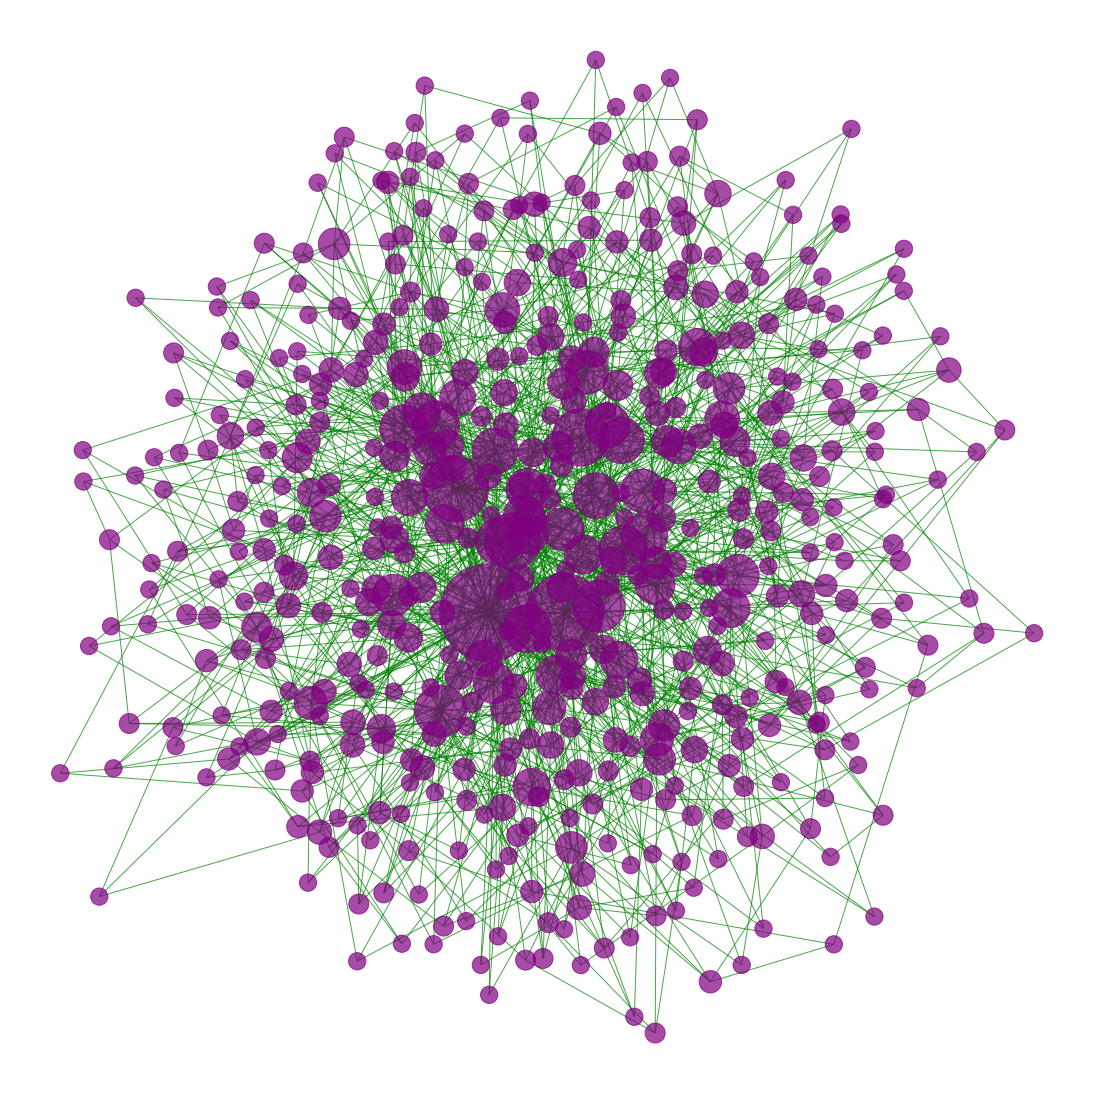

./graphs/erdos-renyi\erdos_renyi_9_n500_p0.001.csv


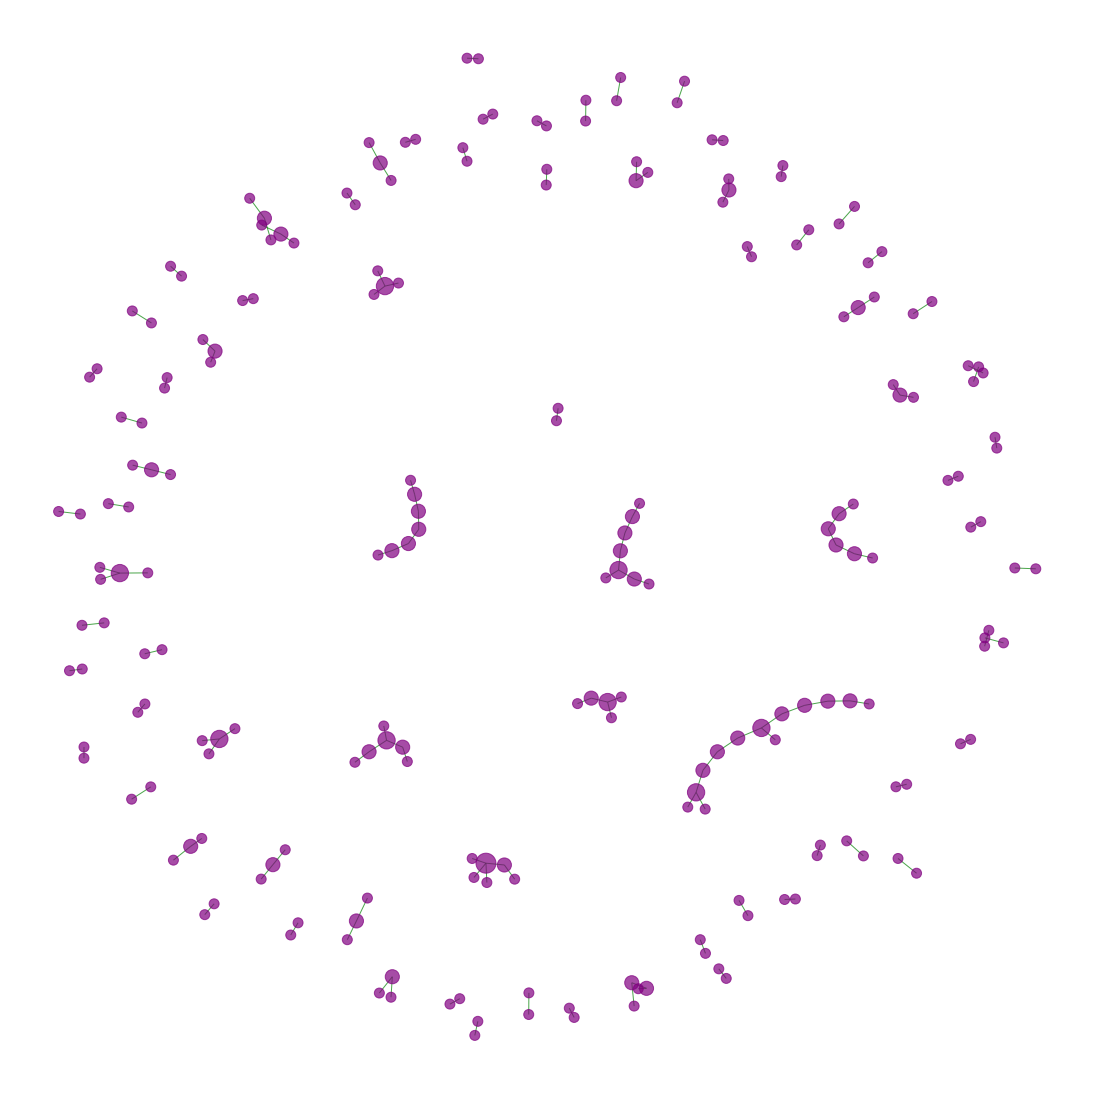

./graphs/erdos-renyi\conectada\erdos_renyi_9_n500_p0.006.csv


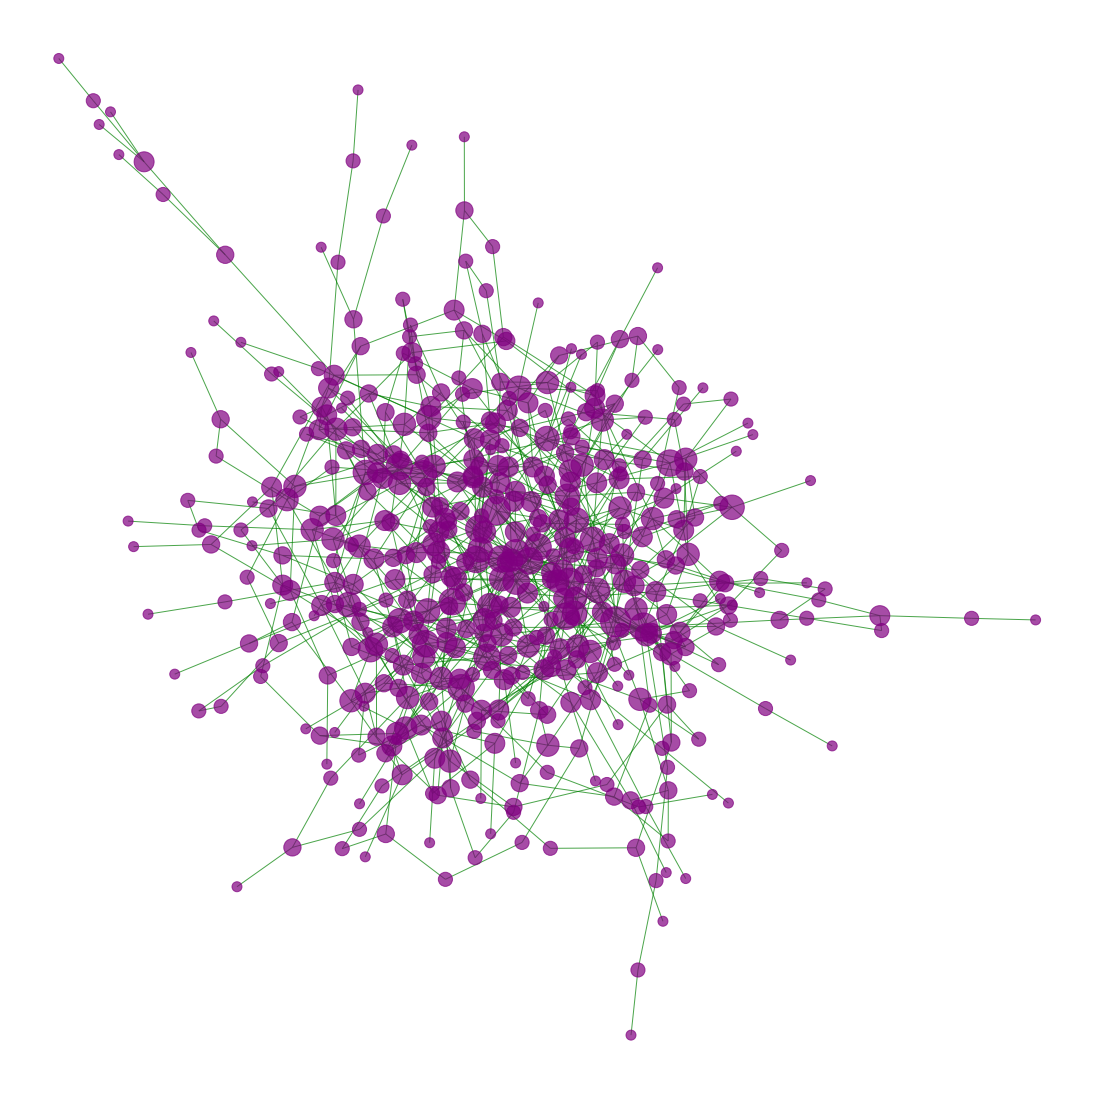

./graphs/erdos-renyi\subcritica\erdos_renyi_9_n500_p0.001.csv


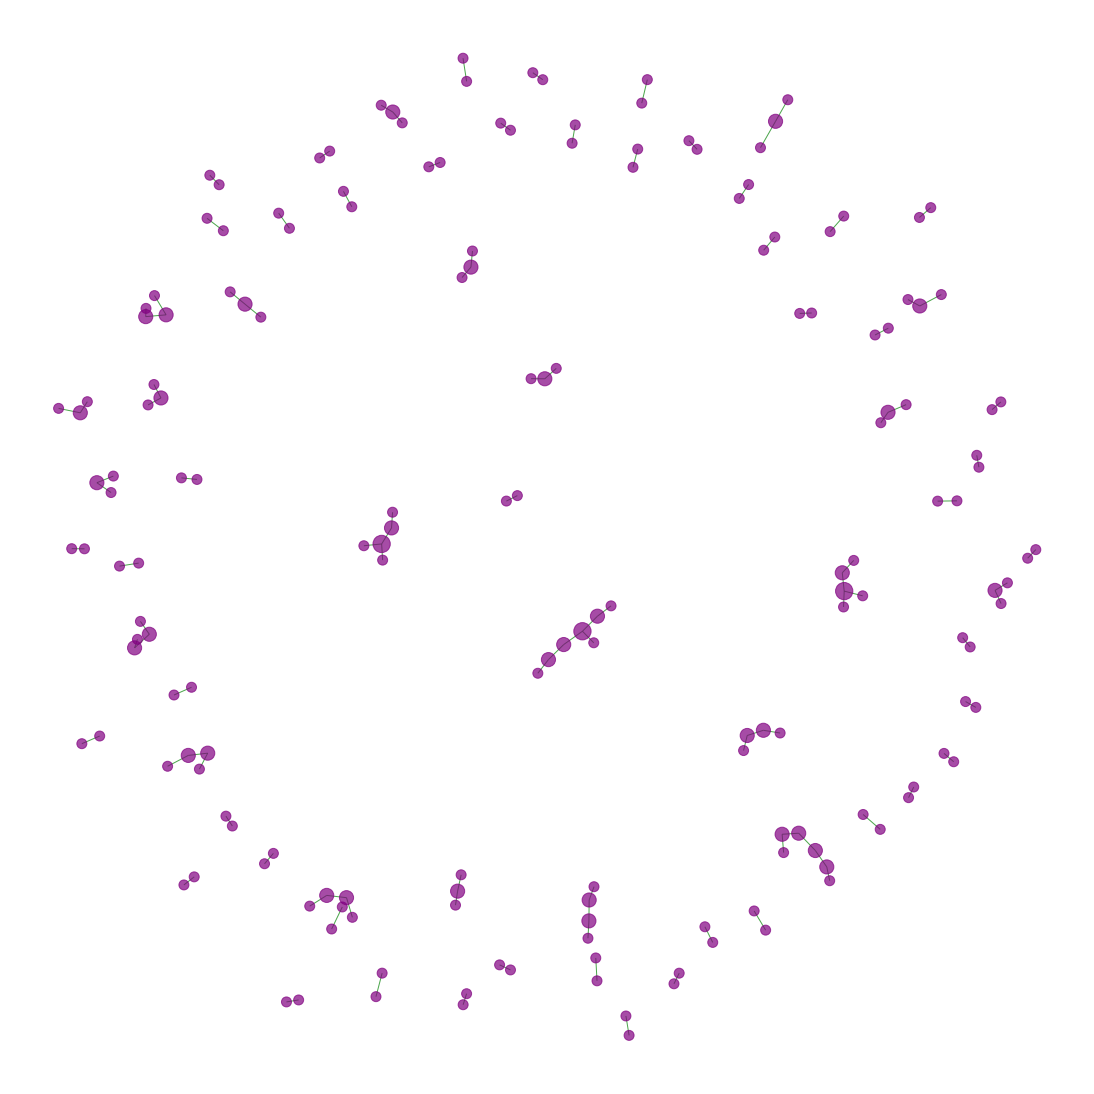

In [6]:
'''
erdos renyi graphs for every region with N=500
conectada p = 0.6
supercritica p = 0.3
critica p = 0.2
subcritica p = 0.1
'''
util_graphs = [31,51,41,71]
index = 31
for k,v in er_dict.items():
    if index in util_graphs:
        print(k)
        draw_graph_node_size(v,15,15)
    index=index+1

0 barabasi_albert_n1895_m10.csv
19.894459102902374


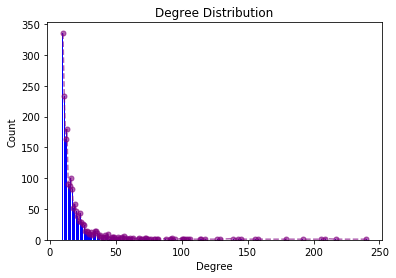

1 barabasi-albert\barabasi_albert_n5000_m3_1.csv
5.9964


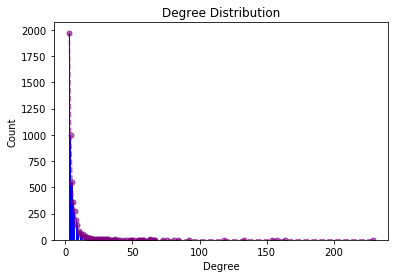

2 barabasi-albert\barabasi_albert_n5000_m4_1.csv
7.9936


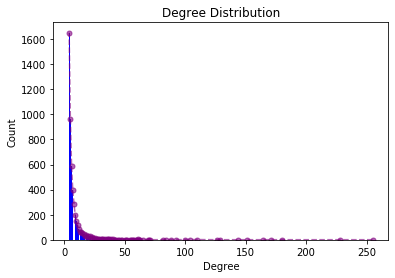

3 barabasi-albert\barabasi_albert_n500_m3_1.csv
5.964


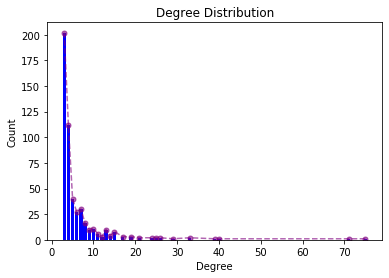

4 barabasi-albert\steps\ba_steps_005.csv
2.4


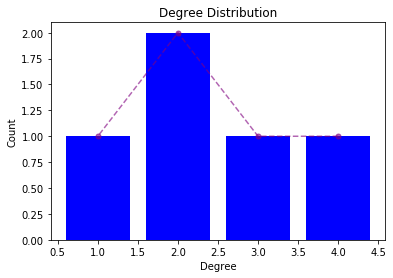

5 barabasi-albert\steps\ba_steps_015.csv
4.8


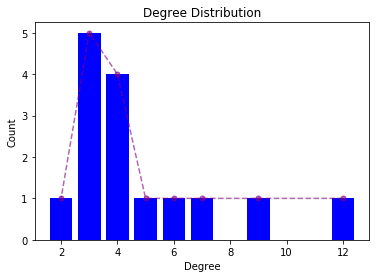

6 barabasi-albert\steps\ba_steps_025.csv
5.28


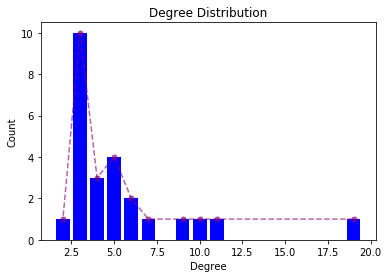

7 barabasi-albert\steps\ba_steps_075.csv
5.76


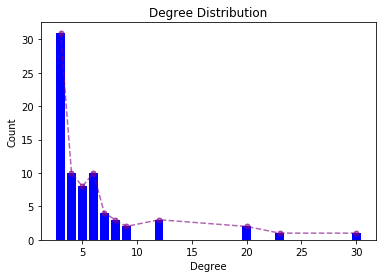

8 barabasi-albert\steps\ba_steps_125.csv
5.856


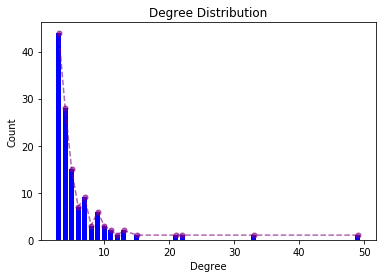

9 barabasi-albert\steps\ba_steps_175.csv
5.897142857142857


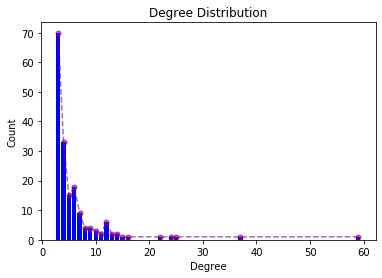

10 barabasi-albert\steps\ba_steps_225.csv
5.92


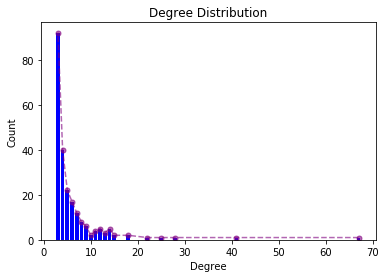

11 barabasi-albert\steps\ba_steps_250.csv
5.928


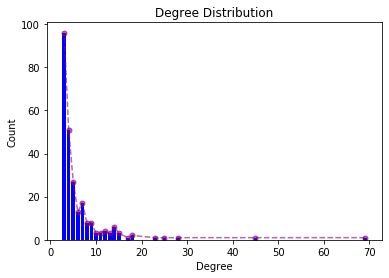

12 barabasi-albert\steps\ba_steps_275.csv
5.934545454545455


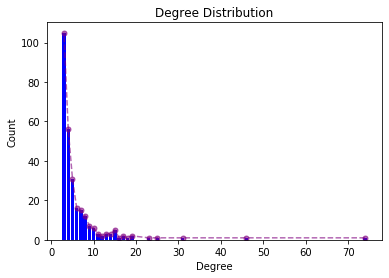

13 barabasi-albert\steps\ba_steps_325.csv
5.944615384615385


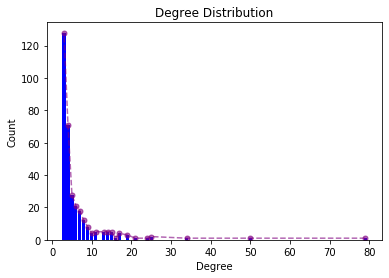

14 barabasi-albert\steps\ba_steps_375.csv
5.952


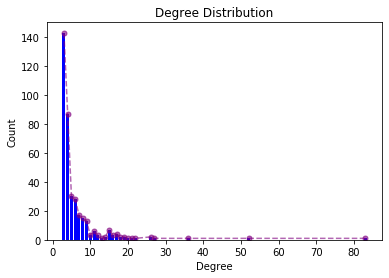

15 barabasi-albert\steps\ba_steps_425.csv
5.95764705882353


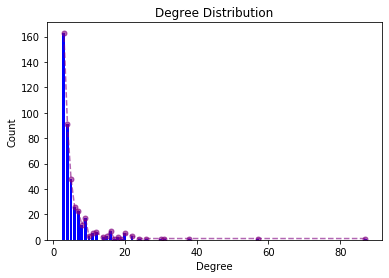

16 barabasi-albert\steps\ba_steps_475.csv
5.962105263157895


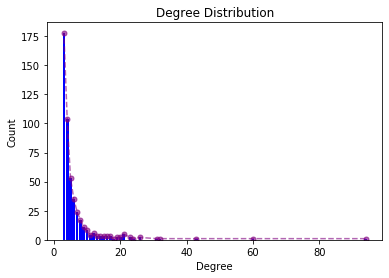

17 erdos-renyi\erdos_renyi_0_n500_p0.001.csv
1.3043478260869565


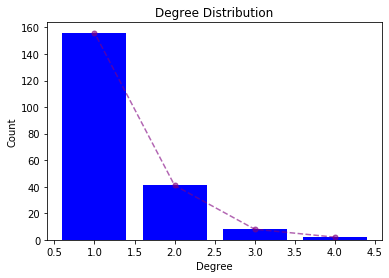

18 erdos-renyi\conectada\erdos_renyi_0_n500_p0.006.csv
3.0337552742616034


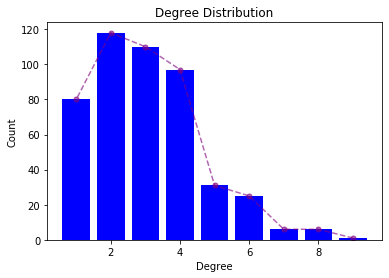

19 erdos-renyi\critica\erdos_renyi_0_n500_p0.002.csv
1.5808383233532934


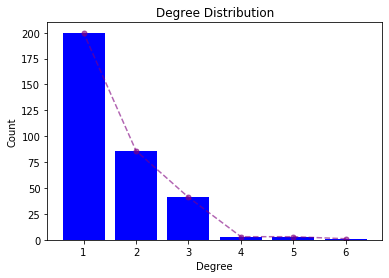

20 erdos-renyi\supercritica\erdos_renyi_0_n500_p0.003.csv
1.9272727272727272


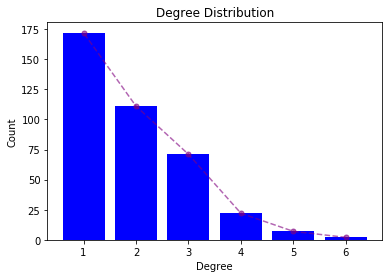

In [9]:
import matplotlib.pyplot as plt
import networkx as nx
import collections
import numpy as np
from scipy.special import factorial


#list of utils networks to analyze
#0, 4, 14, 22, 26, 31, 32, 42, 52, 62, 63, 64, 65, 76
networks = [0,2,4,6,9,11,12,14,16,18,20,21,22,24,26,28,30,32,42,52,72]
new_g_list = []
new_files = []
avg = []

for i in range(len(networks)):
    new_g_list.append(g_list[networks[i]])
    new_files.append(files[networks[i]])


for i,g in enumerate(new_g_list):
    print(i,new_files[i][9:])
    degree_sequence = sorted([d for n, d in g.degree()], reverse=True)  # degree sequence
    print(np.mean(degree_sequence))
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')
    plt.plot(deg, cnt, marker='o',linestyle='dashed', color='purple',markersize=5, alpha=0.6)

    plt.title("Degree Distribution")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    #ax.set_xticks([d for d in deg])
    #ax.set_xticklabels(deg)
    if False:
        # draw graph in inset
        plt.axes([0.4, 0.4, 0.5, 0.5])
        Gcc = g.subgraph(sorted(nx.connected_components(g), key=len, reverse=True)[0])
        pos = nx.spring_layout(g)
        plt.axis('off')
        nx.draw_networkx_nodes(g, pos, node_size=20, node_color='purple', alpha=0.5)
        nx.draw_networkx_edges(g, pos, alpha=0.4, edge_color='green')

    plt.show()


In [9]:
#poisson
t = np.arange(0, 20, 0.1)
d = np.exp(-5)*np.power(4, t)/factorial(t)
#plt.plot(t, d)
#plt.show()

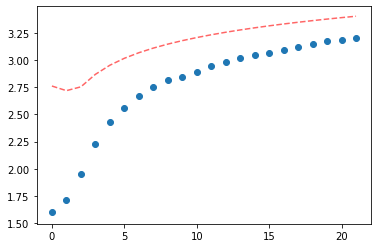

0.405348946651017


In [10]:
import numpy as np
import networkx as nx

index = 0
i = 0
spl = []
ac = []
a = []
t = []
fig, ax = plt.subplots()
for k, v in ba_dict.items():
    if index > 8:
        a.append(nx.algorithms.average_shortest_path_length(v))
        t.append((np.log(len(v))/(np.log(np.log(len(v))))))
        
        #print(k)
        #print("Actual Diameter Value:\t\t", a[i])
        #print("Theoric Diameter Value:\t\t", t[i] ) #ln(N)/ln(ln(N))
        #print("Difference:\t\t\t", abs(a[i]-t[i]))
        #print("------------------------------------------------------")
        spl.append(abs(a[i]-t[i]))
        
        i=i+1
    index = index+1

plt.scatter(np.arange(len(a)),a)
#plt.scatter(np.arange(len(t)),t, color='r')
plt.plot(np.arange(len(t)),t, color='r', linestyle='dashed', alpha=0.6)
plt.show()
print(np.mean(spl))


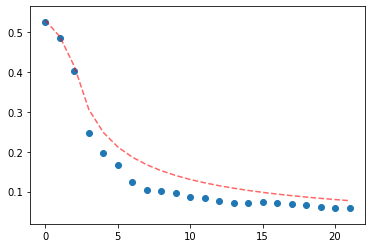

0.03359456851912637


In [11]:
index = 0
i = 0
spl = []
ac = []
a = []
t = []
for k, v in ba_dict.items():
    if index > 8:
        a.append(nx.algorithms.average_clustering(v))
        t.append((np.log(len(v))**2)/len(v))
        #print(k)
        #print("Actual Clustering Value:\t", a[i])
        #print("Theoric Clustering Value:\t", t[i]) #ln(N)^2/N
        #print("Difference:\t\t\t", abs(a[i]-t[i]))
        #print("------------------------------------------------------")
        
        ac.append(abs(a[i]-t[i]))
        i=i+1
    index = index+1
    

plt.scatter(np.arange(len(a)),a, )
#plt.scatter(np.arange(len(t)),t, color='r', alpha=0.5)
plt.plot(np.arange(len(t)),t, color='r', linestyle='dashed', alpha=0.6)
plt.show()
print(np.mean(ac))

./graphs/erdos-renyi\erdos_renyi_0_n500_p0.001.csv
./graphs/erdos-renyi\conectada\erdos_renyi_0_n500_p0.006.csv
./graphs/erdos-renyi\critica\erdos_renyi_0_n500_p0.002.csv
./graphs/erdos-renyi\subcritica\erdos_renyi_0_n500_p0.001.csv
./graphs/erdos-renyi\supercritica\erdos_renyi_0_n500_p0.003.csv


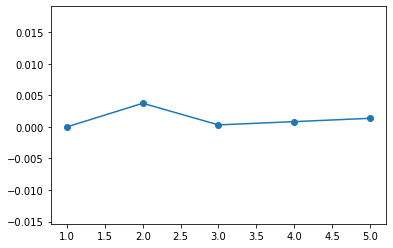

In [59]:
avg = []
clust = []
i= 0
for k,v in er_dict.items():
    if i % 10 == 0:
        print(k)
        avg.append(nx.average_clustering(v))
    else:
        avg[(i-i % 10) // 10] += nx.average_clustering(v)
    i=i+1

for i in range(len(avg)):
    avg[i] = avg[i]/10
plt.scatter([1,2,3,4,5], avg)
plt.plot([1,2,3,4,5], avg)
plt.show()